In [1]:
from pykrx import stock
from datetime import datetime
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

## Step 1. KOSPI 200 거래정보 가져오기

In [30]:
period_m = pd.period_range('200210', '202206', freq='')
period_m = period_m.to_timestamp()
period_m

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01'],
              dtype='datetime64[ns]', freq='MS')

In [2]:
import requests

In [16]:
today = datetime.today().strftime('%Y%m%d')
payloads = {
    'bld': 'dbms/MDC/STAT/standard/MDCSTAT04501',
    'locale': 'ko_KR',
    'tboxindTpCd_finder_secuprodisu1_4': '365780/KINDEX 국고채10년',
    'isuCd': 'KR7365780006',
    'isuCd2':'365780',
    'codeNmindTpCd_finder_secuprodisu1_4': 'KINDEX 국고채10년',
    'share':'1',
    'money':'1',
    'strtDd': '20021014',
    'endDd': today,
    'csvxls_isNo': 'false'
}

In [17]:
res = requests.post('http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd', data=payloads)
res

<Response [200]>

In [21]:
kdx_bond_10y = pd.DataFrame(res.json()['output']).iloc[:,:-7]
kdx_bond_10y.columns = ['일자','종가','-','대비','등락률','순자산가치','시가','고가','저가','거래량','거래대금','시가총액']
kdx_bond_10y

,일자,종가,-,대비,등락률,순자산가치,시가,고가,저가,거래량,거래대금,시가총액
0,2022/06/07,"86,570",2,845,-0.97,"86,643.16","87,055","87,055","86,570","5,056","438,445,470","98,170,380,000"
1,2022/06/03,"87,415",1,150,0.17,"87,420.07","87,435","87,505","87,100","1,707","148,938,735","99,128,610,000"
2,2022/06/02,"87,265",2,755,-0.86,"87,313.75","88,020","88,020","87,140","2,476","216,616,730","98,958,510,000"
3,2022/05/31,"88,020",2,850,-0.96,"87,945.48","88,600","88,615","87,980","8,855","781,409,795","99,814,680,000"
4,2022/05/30,"88,870",1,40,0.05,"88,699.49","88,615","88,915","88,615",456,"40,502,205","100,778,580,000"
...,...,...,...,...,...,...,...,...,...,...,...,...
401,2020/10/21,"100,070",2,595,-0.59,"100,055.32","100,300","100,300","100,070",96,"9,610,855","10,207,140,000"
402,2020/10/20,"100,665",1,350,0.35,"100,501.22","100,580","100,665","100,580","6,003","604,291,740","10,267,830,000"
403,2020/10/19,"100,315",1,105,0.10,"100,711.75","100,315","100,315","100,315","6,000","601,890,000","10,232,130,000"
404,2020/10/16,"100,210",2,230,-0.23,"100,207.29","100,295","100,295","100,210","6,021","603,860,565","10,221,420,000"


In [59]:
def get_stock_price(code, ticker):
    today = datetime.today().strftime('%Y%m%d')
    payloads = {
        'bld': 'dbms/MDC/STAT/standard/MDCSTAT04501',
        'locale': 'ko_KR',
        # 'tboxindTpCd_finder_secuprodisu1_4': f'{ticker}/{name}',
        'isuCd': f'KR7{ticker}00{code}',
        'isuCd2':ticker,
        # 'codeNmindTpCd_finder_secuprodisu1_4': f'{name}',
        'share':'1',
        'money':'1',
        'strtDd': '20000000',
        'endDd': today,
        'csvxls_isNo': 'false'
    }

    res = requests.post('http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd', data=payloads)
    print(res)
    df = pd.DataFrame(res.json()['output']).iloc[:,:-7]
    df.columns = ['일자','종가','-','대비','등락률','순자산가치','시가','고가','저가','거래량','거래대금','시가총액']
    df.drop(['-'], axis=1, inplace=True) # 대비 및 등락률 음/양 표시
    df['일자'] = df['일자'].apply(lambda x : x.replace('/','-'))
    return df

In [61]:
kr_bond_10y = get_stock_price(6,'148070') # KOSEF 국고채 10년
kr_bond_10y

<Response [200]>


,일자,종가,대비,등락률,순자산가치,시가,고가,저가,거래량,거래대금,시가총액
0,2022-06-07,"108,875","1,200",-1.09,"109,110.79","110,700","110,700","108,875","47,865","5,224,533,690","345,133,750,000"
1,2022-06-03,"110,075",175,0.16,"109,956.84","110,005","110,210","109,550","14,549","1,598,136,910","345,635,500,000"
2,2022-06-02,"109,900",850,-0.77,"109,817.33","110,245","110,535","109,570","25,208","2,773,954,010","343,987,000,000"
3,2022-05-31,"110,750","1,075",-0.96,"110,649.14","111,530","111,600","110,690","25,461","2,829,131,095","347,755,000,000"
4,2022-05-30,"111,825",40,0.04,"111,641.59","110,950","112,005","110,950","10,109","1,130,406,180","351,130,500,000"
...,...,...,...,...,...,...,...,...,...,...,...
2613,2011-10-26,"99,595",145,0.15,"99,516.51","99,385","99,615","99,285","17,543","1,746,550,690","19,919,000,000"
2614,2011-10-25,"99,450",195,0.20,"99,335.11","99,405","99,545","99,350","1,186","117,944,400","19,890,000,000"
2615,2011-10-24,"99,255",345,-0.35,"99,354.55","99,630","99,630","99,220","4,303","427,094,755","19,851,000,000"
2616,2011-10-21,"99,600",445,-0.44,"99,642.85","99,885","99,950","99,435","4,286","427,319,625","19,920,000,000"


In [62]:
us_bond_10y = get_stock_price(4,'305080') # TIGER 미국채 10년
us_bond_10y

<Response [200]>


,일자,종가,대비,등락률,순자산가치,시가,고가,저가,거래량,거래대금,시가총액
0,2022-06-07,"11,550",35,0.30,"11,549.98","11,515","11,580","11,510","68,932","794,989,140","85,470,000,000"
1,2022-06-03,"11,515",65,-0.56,"11,509.25","11,580","11,580","11,470","166,354","1,911,585,810","85,211,000,000"
2,2022-06-02,"11,580",80,0.70,"11,577.89","11,500","11,605","11,490","96,460","1,115,324,730","85,692,000,000"
3,2022-05-31,"11,500",90,-0.78,"11,577.94","11,585","11,585","11,500","40,940","471,995,980","85,100,000,000"
4,2022-05-30,"11,590",185,-1.57,"11,600.73","11,775","11,775","11,590","33,727","393,918,115","84,607,000,000"
...,...,...,...,...,...,...,...,...,...,...,...
922,2018-09-05,"10,100",45,0.45,"10,092.64","10,075","10,100","10,025","2,707","27,220,930","9,090,000,000"
923,2018-09-04,"10,055",30,0.30,"10,062.47","10,045","10,070","10,045","2,340","23,535,845","9,049,500,000"
924,2018-09-03,"10,025",25,-0.25,"10,021.29","10,070","10,085","10,015",498,"5,010,010","9,022,500,000"
925,2018-08-31,"10,050",65,0.65,"10,035.60","10,060","10,060","10,040","5,500","55,255,780","9,045,000,000"


In [65]:
us_dollar = get_stock_price(6,'261240') # KODEX 미국 달러 선물
us_dollar

<Response [200]>


,일자,종가,대비,등락률,순자산가치,시가,고가,저가,거래량,거래대금,시가총액
0,2022-06-07,"11,130",150,1.37,"11,118.59","11,060","11,135","11,060","85,712","951,824,725","91,154,700,000"
1,2022-06-03,"10,980",95,-0.86,"10,986.87","10,995","11,005","10,945","49,212","539,709,365","90,036,000,000"
2,2022-06-02,"11,075",130,1.19,"11,072.34","11,010","11,095","11,010","52,520","580,542,275","90,815,000,000"
3,2022-05-31,"10,945",0,0.00,"10,945.92","10,945","10,985","10,920","66,673","729,677,745","89,639,550,000"
4,2022-05-30,"10,945",165,-1.49,"10,952.39","11,110","11,115","10,945","176,218","1,938,775,310","90,077,350,000"
...,...,...,...,...,...,...,...,...,...,...,...
1331,2017-01-03,"10,020",35,-0.35,"10,019.64","10,055","10,090","10,005","168,286","1,694,144,285","15,030,000,000"
1332,2017-01-02,"10,055",0,0.00,"10,058.10","10,065","10,065","10,040","146,119","1,468,696,225","15,082,500,000"
1333,2016-12-29,"10,055",5,0.05,"10,066.17","10,060","10,075","10,050","179,934","1,811,764,970","15,082,500,000"
1334,2016-12-28,"10,050",10,0.10,"10,078.07","10,050","10,055","10,030","160,822","1,614,947,265","15,075,000,000"


In [ ]:
us_dollar['종가']

In [64]:
us_stock = get_stock_price(6,'379800') # KODEX 미국 S&P500TR
us_stock

<Response [200]>


,일자,종가,대비,등락률,순자산가치,시가,고가,저가,거래량,거래대금,시가총액
0,2022-06-07,"11,420",90,-0.78,"11,494.85","11,535","11,535","11,410","185,190","2,116,038,915","420,256,000,000"
1,2022-06-03,"11,510",120,1.05,"11,509.47","11,630","11,630","11,420","109,956","1,264,668,065","421,841,500,000"
2,2022-06-02,"11,390",30,-0.26,"11,384.72","11,440","11,455","11,310","127,209","1,446,776,300","417,443,500,000"
3,2022-05-31,"11,420",100,-0.87,"11,403.96","11,470","11,470","11,395","242,525","2,771,976,465","418,543,000,000"
4,2022-05-30,"11,520",250,2.22,"11,416.91","11,480","11,575","11,480","393,506","4,542,602,200","422,208,000,000"
...,...,...,...,...,...,...,...,...,...,...,...
281,2021-04-15,"10,130",15,-0.15,"10,115.34","10,130","10,145","10,110","160,220","1,622,707,995","50,650,000,000"
282,2021-04-14,"10,145",45,-0.44,"10,146.76","10,200","10,200","10,145","260,290","2,647,991,705","45,652,500,000"
283,2021-04-13,"10,190",35,0.34,"10,196.87","10,210","10,210","10,180","198,171","2,019,699,740","40,760,000,000"
284,2021-04-12,"10,155",70,0.69,"10,189.68","10,150","10,170","10,120","200,650","2,035,770,010","40,620,000,000"


In [66]:
kr_stock = get_stock_price(7, '069500') # KODEX 200
kr_stock

<Response [200]>


,일자,종가,대비,등락률,순자산가치,시가,고가,저가,거래량,거래대금,시가총액
0,2022-06-07,"34,595",655,-1.86,"34,633.67","35,080","35,100","34,525","3,766,658","130,818,528,665","5,220,385,500,000"
1,2022-06-03,"35,250",195,0.56,"35,266.74","35,355","35,430","35,165","6,270,309","221,157,119,915","5,430,262,500,000"
2,2022-06-02,"35,055",385,-1.09,"35,116.75","35,240","35,275","34,980","5,957,733","209,001,199,670","5,260,002,750,000"
3,2022-05-31,"35,440",140,0.40,"35,519.05","35,240","35,505","35,075","5,485,464","194,278,166,575","5,191,960,000,000"
4,2022-05-30,"35,300",455,1.31,"35,315.86","35,225","35,340","35,070","5,384,386","189,973,404,340","5,136,150,000,000"
...,...,...,...,...,...,...,...,...,...,...,...
4854,2002-10-18,"8,430",350,4.33,"8,456.22","8,300","8,500","8,250","1,321,300","11,076,949,000","194,733,000,000"
4855,2002-10-17,"8,080",110,1.38,"8,118.38","7,980","8,180","7,870","2,091,777","16,837,927,960","187,456,000,000"
4856,2002-10-16,"7,970",30,0.38,"8,010.07","8,040","8,040","7,910","2,039,150","16,269,042,600","180,122,000,000"
4857,2002-10-15,"7,940",190,2.45,"7,921.53","7,850","7,980","7,700","2,288,769","17,893,721,760","179,444,000,000"


In [67]:
import pandas_datareader.data as web

In [96]:
kr_bond = web.DataReader('148070.KS', 'yahoo', start='20010101', end=datetime.today().strftime('%Y%m%d'))
kr_bond

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-10-20,100100.0,99940.0,99970.0,100045.0,43093.0,100045.0
2011-10-21,99950.0,99435.0,99885.0,99600.0,4286.0,99600.0
2011-10-24,99630.0,99220.0,99630.0,99255.0,4303.0,99255.0
2011-10-25,99545.0,99350.0,99405.0,99450.0,1186.0,99450.0
2011-10-26,99615.0,99285.0,99385.0,99595.0,17543.0,99595.0
...,...,...,...,...,...,...
2022-02-24,116480.0,115010.0,115500.0,116480.0,5328.0,116480.0
2022-02-25,116000.0,115630.0,115900.0,115855.0,68293.0,115855.0
2022-02-28,115855.0,115855.0,115855.0,115855.0,0.0,115855.0


In [95]:
kr_stock = web.DataReader('^KS11', 'yahoo', start='20010101', end=datetime.today().strftime('%Y%m%d'))
kr_stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-01-02,521.340027,500.970001,503.309998,520.950012,231000.0,520.950012
2001-01-03,524.580017,510.700012,512.739990,521.429993,324600.0,521.429993
2001-01-04,567.159973,550.909973,551.530029,558.020020,444500.0,558.020020
2001-01-05,581.409973,555.400024,559.539978,580.849976,578300.0,580.849976
2001-01-08,587.909973,572.479980,573.719971,586.650024,558600.0,586.650024
...,...,...,...,...,...,...
2022-05-30,2672.739990,2654.179932,2662.310059,2669.659912,469300.0,2669.659912
2022-05-31,2685.899902,2654.320068,2666.879883,2685.899902,670700.0,2685.899902
2022-06-02,2674.000000,2653.590088,2670.739990,2658.989990,524900.0,2658.989990


In [75]:
us_stock = web.DataReader('SPY', 'yahoo', start='20010101', end=datetime.today().strftime('%Y%m%d'))
us_stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-01-02,132.156250,127.562500,132.000000,128.812500,8737500.0,86.417236
2001-01-03,136.000000,127.656250,128.312500,135.000000,19431600.0,90.568214
2001-01-04,135.468750,133.000000,134.937500,133.546875,9219000.0,89.593422
2001-01-05,133.625000,129.187500,133.468750,129.187500,12911400.0,86.668823
2001-01-08,130.187500,127.687500,129.875000,130.187500,6625300.0,87.339638
...,...,...,...,...,...,...
2022-05-31,416.459991,410.029999,413.549988,412.929993,95937000.0,412.929993
2022-06-01,416.239990,406.929993,415.170013,409.589996,86585800.0,409.589996
2022-06-02,417.440002,407.040009,409.420013,417.390015,79609600.0,417.390015


In [74]:
us_bond = web.DataReader('TLT', 'yahoo', start='20010101', end=datetime.today().strftime('%Y%m%d'))
us_bond

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-07-30,81.900002,81.519997,81.750000,81.519997,6100.0,41.882282
2002-07-31,82.800003,81.900002,81.949997,82.529999,29400.0,42.401207
2002-08-01,83.019997,82.540001,82.540001,83.000000,25000.0,42.642681
2002-08-02,84.099998,82.879997,83.160004,83.849998,52800.0,43.079384
2002-08-05,84.440002,83.849998,84.040001,84.220001,61100.0,43.269501
...,...,...,...,...,...,...
2022-05-31,117.230003,115.930000,117.180000,116.559998,28393700.0,116.352997
2022-06-01,117.339996,115.690002,117.029999,116.220001,15544800.0,116.220001
2022-06-02,116.709999,115.459999,116.629997,116.279999,9832000.0,116.279999


In [108]:
dollar = web.DataReader('KRW=X', 'yahoo', start='20010101', end=datetime.today().strftime('%Y%m%d'))
dollar

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-01,1203.500000,1195.000000,1197.300049,1198.400024,0.0,1198.400024
2003-12-02,1198.500000,1186.199951,1198.099976,1195.000000,0.0,1195.000000
2003-12-03,1198.400024,1192.500000,1195.000000,1192.500000,0.0,1192.500000
2003-12-04,1197.900024,1174.800049,1192.599976,1190.099976,0.0,1190.099976
2003-12-05,1193.800049,1178.599976,1189.400024,1184.699951,0.0,1184.699951
...,...,...,...,...,...,...
2022-05-31,1247.270020,1239.010010,1241.739990,1241.739990,0.0,1241.739990
2022-06-01,1254.430054,1238.229980,1246.949951,1246.949951,0.0,1246.949951
2022-06-02,1251.030029,1238.260010,1240.839966,1240.839966,0.0,1240.839966


In [107]:
gold = web.DataReader('GLD', 'yahoo', start='20010101', end=datetime.today().strftime('%Y%m%d'))
gold

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-11-18,44.490002,44.070000,44.430000,44.380001,5992000,44.380001
2004-11-19,44.919998,44.470001,44.490002,44.779999,11655300,44.779999
2004-11-22,44.970001,44.740002,44.750000,44.950001,11996000,44.950001
2004-11-23,44.919998,44.720001,44.880001,44.750000,3169200,44.750000
2004-11-24,45.049999,44.790001,44.930000,45.049999,6105100,45.049999
...,...,...,...,...,...,...
2022-05-31,173.070007,171.080002,172.710007,171.139999,6244000,171.139999
2022-06-01,172.529999,171.389999,172.210007,172.229996,6946500,172.229996
2022-06-02,174.449997,173.490005,173.660004,174.350006,5623100,174.350006


In [150]:
df = pd.concat([kr_stock['Close'], kr_bond['Close'], us_stock['Close'], us_bond['Close'], dollar['Close'], gold['Close']], axis=1).dropna()
df.columns = ['kr_stock', 'kr_bond', 'us_stock', 'us_bond', 'dollar', 'gold']
df

,kr_stock,kr_bond,us_stock,us_bond,dollar,gold
Date,,,,,,
2011-10-20,1805.089966,100045.0,121.660004,114.339996,1137.300049,157.770004
2011-10-24,1898.319946,99255.0,125.489998,113.320000,1132.800049,161.020004
2011-10-25,1888.650024,99450.0,123.050003,116.199997,1131.099976,165.589996
2011-10-26,1894.310059,99595.0,124.300003,114.169998,1130.699951,167.399994
2011-10-27,1922.040039,99440.0,128.630005,110.300003,1106.300049,169.550003
...,...,...,...,...,...,...
2022-02-23,2719.530029,115410.0,421.950012,136.679993,1192.680054,178.289993
2022-02-24,2648.800049,116480.0,428.299988,136.770004,1192.400024,177.139999
2022-02-25,2676.760010,115855.0,437.750000,136.869995,1206.000000,176.550003


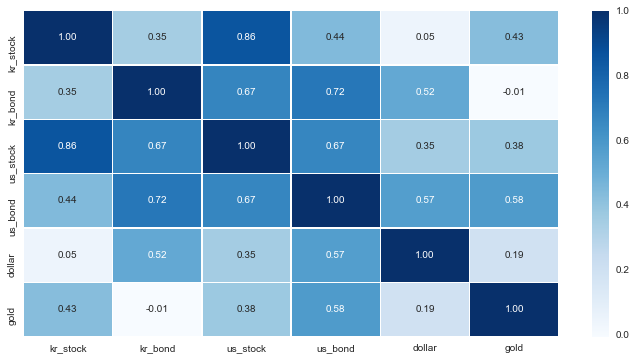

In [111]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, fmt='.2f', cmap='Blues')
plt.show()

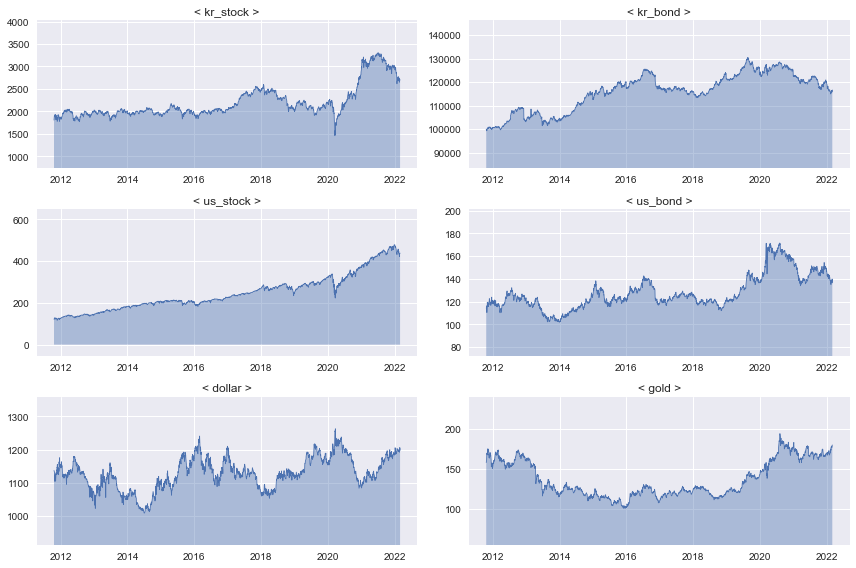

In [143]:
def show_plot(loc, df, col):
    plt.subplot(loc)
    plt.plot(df[col], linewidth=0.8)
    plt.fill_between(x=df[col].index, y1=df[col].values, alpha=0.4)
    plt.ylim((df[col].min()-2*df[col].std(), df[col].max()+2*df[col].std()))
    plt.title(f'< {col} >')
    
plt.figure(figsize=(12,8))
show_plot(321, df, 'kr_stock')
show_plot(322, df, 'kr_bond')
show_plot(323, df, 'us_stock')
show_plot(324, df, 'us_bond')
show_plot(325, df, 'dollar')
show_plot(326, df, 'gold')

plt.tight_layout()
plt.show()

In [126]:
df.diff()

,kr_stock,kr_bond,us_stock,us_bond,dollar,gold
Date,,,,,,
2011-10-20,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-24,93.229980,-790.0,3.829994,-1.019997,-4.500000,3.250000
2011-10-25,-9.669922,195.0,-2.439995,2.879997,-1.700073,4.569992
2011-10-26,5.660034,145.0,1.250000,-2.029999,-0.400024,1.809998
2011-10-27,27.729980,-155.0,4.330002,-3.869995,-24.399902,2.150009
...,...,...,...,...,...,...
2022-02-23,12.739990,0.0,-7.619995,-1.910004,-2.000000,0.799988
2022-02-24,-70.729980,1070.0,6.349976,0.090012,-0.280029,-1.149994
2022-02-25,27.959961,-625.0,9.450012,0.099991,13.599976,-0.589996


In [132]:
df['rate'] = 0
for x in range(1, len(df)):
    df['rate'].iloc[x] = (df['kr_stock'].iloc[x] - df['kr_stock'].iloc[x-1]) / (df['kr_stock'].iloc[x-1]) * 100
    

In [140]:
# earning ratio
df_er = df.pct_change().fillna(0) * 100
df_er

,kr_stock,kr_bond,us_stock,us_bond,dollar,gold
Date,,,,,,
2011-10-20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-10-24,5.164838,-0.789645,3.148113,-0.892073,-0.395674,2.059961
2011-10-25,-0.509394,0.196464,-1.944374,2.541473,-0.150077,2.838152
2011-10-26,0.299687,0.145802,1.015847,-1.746987,-0.035366,1.093060
2011-10-27,1.463856,-0.155630,3.483509,-3.389678,-2.157947,1.284354
...,...,...,...,...,...,...
2022-02-23,0.470668,0.000000,-1.773866,-1.378168,-0.167409,0.450723
2022-02-24,-2.600816,0.927129,1.504912,0.065856,-0.023479,-0.645013
2022-02-25,1.055571,-0.536573,2.206400,0.073109,1.140555,-0.333068


In [147]:
# 단순 누적 수익률
df_er.cumsum()

,kr_stock,kr_bond,us_stock,us_bond,dollar,gold
Date,,,,,,
2011-10-20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-10-24,5.164838,-0.789645,3.148113,-0.892073,-0.395674,2.059961
2011-10-25,4.655445,-0.593181,1.203739,1.649400,-0.545751,4.898112
2011-10-26,4.955132,-0.447379,2.219586,-0.097587,-0.581117,5.991172
2011-10-27,6.418988,-0.603009,5.703095,-3.487265,-2.739064,7.275527
...,...,...,...,...,...,...
2022-02-23,53.552089,15.479535,138.542580,27.702047,9.273418,24.571838
2022-02-24,50.951273,16.406664,140.047491,27.767903,9.249939,23.926825
2022-02-25,52.006844,15.870092,142.253892,27.841012,10.390494,23.593757


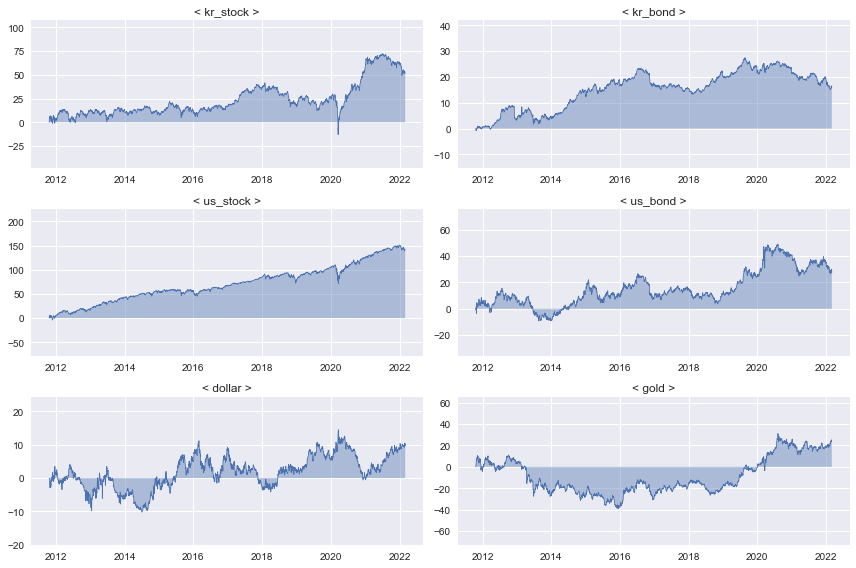

In [146]:
plt.figure(figsize=(12,8))
show_plot(321, df_er.cumsum(), 'kr_stock')
show_plot(322, df_er.cumsum(), 'kr_bond')
show_plot(323, df_er.cumsum(), 'us_stock')
show_plot(324, df_er.cumsum(), 'us_bond')
show_plot(325, df_er.cumsum(), 'dollar')
show_plot(326, df_er.cumsum(), 'gold')

plt.tight_layout()
plt.show()

In [168]:
(df.pct_change() + 1).cumprod().fillna(1)

,kr_stock,kr_bond,us_stock,us_bond,dollar,gold
Date,,,,,,
2011-10-20,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2011-10-24,1.051648,0.992104,1.031481,0.991079,0.996043,1.020600
2011-10-25,1.046291,0.994053,1.011425,1.016267,0.994548,1.049566
2011-10-26,1.049427,0.995502,1.021700,0.998513,0.994197,1.061038
2011-10-27,1.064789,0.993953,1.057291,0.964667,0.972742,1.074666
...,...,...,...,...,...,...
2022-02-23,1.506590,1.153581,3.468272,1.195382,1.048694,1.130063
2022-02-24,1.467406,1.164276,3.520467,1.196169,1.048448,1.122774
2022-02-25,1.482896,1.158029,3.598142,1.197044,1.060406,1.119034


In [172]:
res = [2000, 2000,2000,2000,2000,2000] * (df.pct_change() + 1).cumprod().fillna(1)
res

,kr_stock,kr_bond,us_stock,us_bond,dollar,gold
Date,,,,,,
2011-10-20,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
2011-10-24,2103.296769,1984.207107,2062.962257,1982.158533,1992.086521,2041.199213
2011-10-25,2092.582708,1988.105353,2022.850556,2032.534558,1989.096856,2099.131544
2011-10-26,2098.853901,1991.004048,2043.399627,1997.026444,1988.393392,2122.076306
2011-10-27,2129.578110,1987.905443,2114.581638,1929.333682,1945.484923,2149.331286
...,...,...,...,...,...,...
2022-02-23,3013.179488,2307.161777,6936.544460,2390.764335,2097.388556,2260.125353
2022-02-24,2934.812224,2328.552152,7040.933337,2392.338791,2096.896110,2245.547247
2022-02-25,2965.791246,2316.057774,7196.284511,2394.087800,2120.812359,2238.068052


In [178]:
res.drop(['sum'],axis=1,inplace=True)

In [189]:
df

,kr_stock,kr_bond,us_stock,us_bond,dollar,gold
Date,,,,,,
2011-10-20,1805.089966,100045.0,121.660004,114.339996,1137.300049,157.770004
2011-10-24,1898.319946,99255.0,125.489998,113.320000,1132.800049,161.020004
2011-10-25,1888.650024,99450.0,123.050003,116.199997,1131.099976,165.589996
2011-10-26,1894.310059,99595.0,124.300003,114.169998,1130.699951,167.399994
2011-10-27,1922.040039,99440.0,128.630005,110.300003,1106.300049,169.550003
...,...,...,...,...,...,...
2022-02-23,2719.530029,115410.0,421.950012,136.679993,1192.680054,178.289993
2022-02-24,2648.800049,116480.0,428.299988,136.770004,1192.400024,177.139999
2022-02-25,2676.760010,115855.0,437.750000,136.869995,1206.000000,176.550003


In [179]:
res['sum'] = res.sum(axis=1)
res

,kr_stock,kr_bond,us_stock,us_bond,dollar,gold,sum
Date,,,,,,,
2011-10-20,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,12000.000000
2011-10-24,2103.296769,1984.207107,2062.962257,1982.158533,1992.086521,2041.199213,12165.910399
2011-10-25,2092.582708,1988.105353,2022.850556,2032.534558,1989.096856,2099.131544,12224.301575
2011-10-26,2098.853901,1991.004048,2043.399627,1997.026444,1988.393392,2122.076306,12240.753719
2011-10-27,2129.578110,1987.905443,2114.581638,1929.333682,1945.484923,2149.331286,12256.215080
...,...,...,...,...,...,...,...
2022-02-23,3013.179488,2307.161777,6936.544460,2390.764335,2097.388556,2260.125353,19005.163969
2022-02-24,2934.812224,2328.552152,7040.933337,2392.338791,2096.896110,2245.547247,19039.079861
2022-02-25,2965.791246,2316.057774,7196.284511,2394.087800,2120.812359,2238.068052,19231.101743


In [191]:
(df.pct_change() + 1).cumprod().fillna(1)

,kr_stock,kr_bond,us_stock,us_bond,dollar,gold
Date,,,,,,
2011-10-20,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2011-10-24,1.051648,0.992104,1.031481,0.991079,0.996043,1.020600
2011-10-25,1.046291,0.994053,1.011425,1.016267,0.994548,1.049566
2011-10-26,1.049427,0.995502,1.021700,0.998513,0.994197,1.061038
2011-10-27,1.064789,0.993953,1.057291,0.964667,0.972742,1.074666
...,...,...,...,...,...,...
2022-02-23,1.506590,1.153581,3.468272,1.195382,1.048694,1.130063
2022-02-24,1.467406,1.164276,3.520467,1.196169,1.048448,1.122774
2022-02-25,1.482896,1.158029,3.598142,1.197044,1.060406,1.119034


In [196]:
money = 10000
ratio = [0.25, 0.25, 0.2, 0.2, 0.05, 0.05]
df_balanced = ratio * (df.pct_change() + 1).cumprod().fillna(1) * money
df_balanced['sum'] = df_balanced.sum(axis=1)
df_balanced

,kr_stock,kr_bond,us_stock,us_bond,dollar,gold,sum
Date,,,,,,,
2011-10-20,2500.000000,2500.000000,2000.000000,2000.000000,500.000000,500.000000,10000.000000
2011-10-24,2629.120961,2480.258884,2062.962257,1982.158533,498.021630,510.299803,10162.822068
2011-10-25,2615.728385,2485.131691,2022.850556,2032.534558,497.274214,524.782886,10178.302290
2011-10-26,2623.567377,2488.755060,2043.399627,1997.026444,497.098348,530.519076,10180.365933
2011-10-27,2661.972638,2484.881803,2114.581638,1929.333682,486.371231,537.332821,10214.473812
...,...,...,...,...,...,...,...
2022-02-23,3766.474360,2883.952222,6936.544460,2390.764335,524.347139,565.031338,17067.113854
2022-02-24,3668.515280,2910.690189,7040.933337,2392.338791,524.224028,561.386812,17098.088437
2022-02-25,3707.239058,2895.072218,7196.284511,2394.087800,530.203090,559.517013,17282.403689


In [206]:
df.pct_change() + 1

,kr_stock,kr_bond,us_stock,us_bond,dollar,gold
Date,,,,,,
2011-10-20,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-24,1.051648,0.992104,1.031481,0.991079,0.996043,1.020600
2011-10-25,0.994906,1.001965,0.980556,1.025415,0.998499,1.028382
2011-10-26,1.002997,1.001458,1.010158,0.982530,0.999646,1.010931
2011-10-27,1.014639,0.998444,1.034835,0.966103,0.978421,1.012844
...,...,...,...,...,...,...
2022-02-23,1.004707,1.000000,0.982261,0.986218,0.998326,1.004507
2022-02-24,0.973992,1.009271,1.015049,1.000659,0.999765,0.993550
2022-02-25,1.010556,0.994634,1.022064,1.000731,1.011406,0.996669


In [207]:
(df.pct_change() + 1).cumprod()

,kr_stock,kr_bond,us_stock,us_bond,dollar,gold
Date,,,,,,
2011-10-20,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-24,1.051648,0.992104,1.031481,0.991079,0.996043,1.020600
2011-10-25,1.046291,0.994053,1.011425,1.016267,0.994548,1.049566
2011-10-26,1.049427,0.995502,1.021700,0.998513,0.994197,1.061038
2011-10-27,1.064789,0.993953,1.057291,0.964667,0.972742,1.074666
...,...,...,...,...,...,...
2022-02-23,1.506590,1.153581,3.468272,1.195382,1.048694,1.130063
2022-02-24,1.467406,1.164276,3.520467,1.196169,1.048448,1.122774
2022-02-25,1.482896,1.158029,3.598142,1.197044,1.060406,1.119034


In [218]:
(df.pct_change().iloc[1000:] + 1).cumprod()

,kr_stock,kr_bond,us_stock,us_bond,dollar,gold
Date,,,,,,
2016-07-07,1.010732,1.001039,0.999380,0.999930,1.000346,0.996238
2016-07-11,1.018135,1.001319,1.017838,0.998457,0.993785,0.992782
2016-07-12,1.019512,1.000440,1.025231,0.982043,0.987665,0.976350
2016-07-13,1.026844,1.000320,1.025088,0.993617,0.989093,0.985334
2016-07-14,1.028493,1.003637,1.030812,0.979167,0.977494,0.977732
...,...,...,...,...,...,...
2022-02-23,1.392403,0.922468,2.012544,0.958754,1.032400,1.369039
2022-02-24,1.356189,0.931021,2.042831,0.959386,1.032158,1.360209
2022-02-25,1.370505,0.926025,2.087904,0.960087,1.043930,1.355678


In [208]:
df_balanced

,kr_stock,kr_bond,us_stock,us_bond,dollar,gold,sum
Date,,,,,,,
2011-10-20,2500.000000,2500.000000,2000.000000,2000.000000,500.000000,500.000000,10000.000000
2011-10-24,2629.120961,2480.258884,2062.962257,1982.158533,498.021630,510.299803,10162.822068
2011-10-25,2615.728385,2485.131691,2022.850556,2032.534558,497.274214,524.782886,10178.302290
2011-10-26,2623.567377,2488.755060,2043.399627,1997.026444,497.098348,530.519076,10180.365933
2011-10-27,2661.972638,2484.881803,2114.581638,1929.333682,486.371231,537.332821,10214.473812
...,...,...,...,...,...,...,...
2022-02-23,3766.474360,2883.952222,6936.544460,2390.764335,524.347139,565.031338,17067.113854
2022-02-24,3668.515280,2910.690189,7040.933337,2392.338791,524.224028,561.386812,17098.088437
2022-02-25,3707.239058,2895.072218,7196.284511,2394.087800,530.203090,559.517013,17282.403689


In [254]:
def get_rebalanced_chart(money, ratio):
    """
    ratio : [kr_stock, kr_bond, us_stock, us_bond, dollar, gold]
    """
    df_balanced = ratio * (df.pct_change() + 1).cumprod().fillna(1) * money
    for i in range(len(df)):
        if i % 100 == 0:
            money = df_balanced.iloc[i].sum()
            df_balanced.iloc[i+1:] = ratio * (df.pct_change()+1).iloc[i+1:].cumprod() * money

    df_balanced['sum'] = df_balanced.sum(axis=1)
    return df_balanced

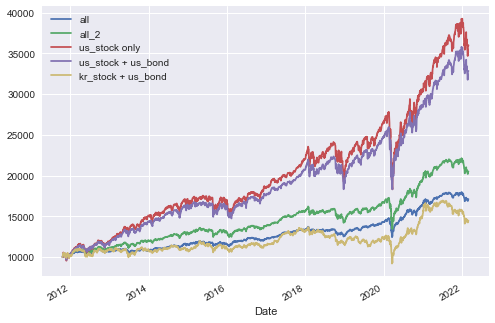

In [263]:
get_rebalanced_chart(10000, [0.25, 0.1, 0.25, 0.1, 0.2, 0.1])['sum'].plot(label='all')
get_rebalanced_chart(10000, [0.3, 0.1, 0.4, 0.1, 0.1, 0])['sum'].plot(label='all_2')
get_rebalanced_chart(10000, [0, 0, 1, 0, 0, 0])['sum'].plot(label='us_stock only')
get_rebalanced_chart(10000, [0, 0, 0.9, 0.1, 0, 0])['sum'].plot(label='us_stock + us_bond')
get_rebalanced_chart(10000, [0.75, 0.25, 0, 0, 0, 0])['sum'].plot(label='kr_stock + us_bond')

plt.legend()
plt.show()

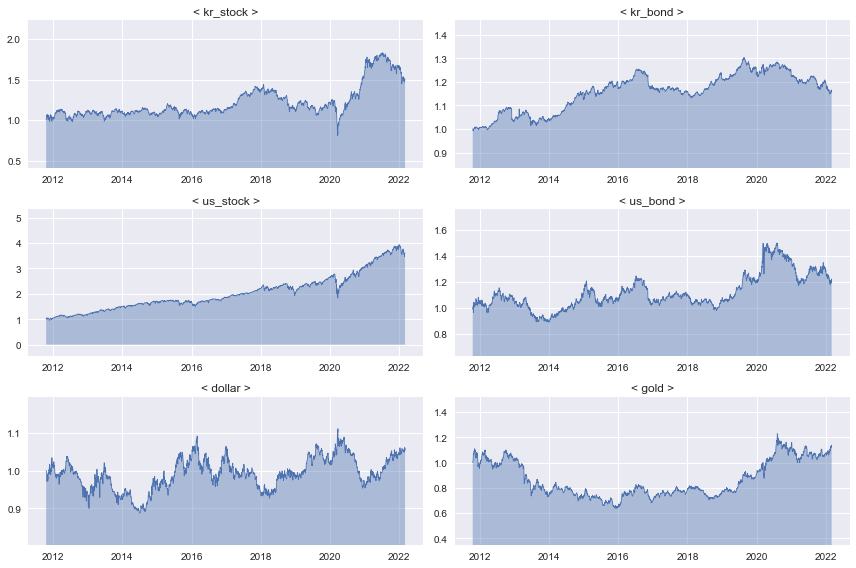

In [160]:
plt.figure(figsize=(12,8))
show_plot(321, (df_er/100 + 1).cumprod(), 'kr_bond')
show_plot(323, (df_er/100 + 1).cumprod(), 'us_stock')
show_plot(324, (df_er/100 + 1).cumprod(), 'us_bond')
show_plot(325, (df_er/100 + 1).cumprod(), 'dollar')
show_plot(326, (df_er/100 + 1).cumprod(), 'gold')

plt.tight_layout()
plt.show()

In [149]:
df

,kr_stock,kr_bond,us_stock,us_bond,dollar,gold
Date,,,,,,
2011-10-20,1806.089966,100046.0,122.660004,115.339996,1138.300049,158.770004
2011-10-24,1899.319946,99256.0,126.489998,114.320000,1133.800049,162.020004
2011-10-25,1889.650024,99451.0,124.050003,117.199997,1132.099976,166.589996
2011-10-26,1895.310059,99596.0,125.300003,115.169998,1131.699951,168.399994
2011-10-27,1923.040039,99441.0,129.630005,111.300003,1107.300049,170.550003
...,...,...,...,...,...,...
2022-02-23,2720.530029,115411.0,422.950012,137.679993,1193.680054,179.289993
2022-02-24,2649.800049,116481.0,429.299988,137.770004,1193.400024,178.139999
2022-02-25,2677.760010,115856.0,438.750000,137.869995,1207.000000,177.550003
